# Comprehensive Analysis of Retail Transactional Dataset


This notebook contains a comprehensive analysis of a retail transactional dataset, exploring various aspects of the data, including customer demographics, purchasing patterns, product preferences, feedback analysis, and transactional logistics.


In [11]:

import pandas as pd

file_path = 'data/retail_data.csv'
retail_data = pd.read_csv(file_path)

retail_data.head()


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## Customer Demographics Analysis

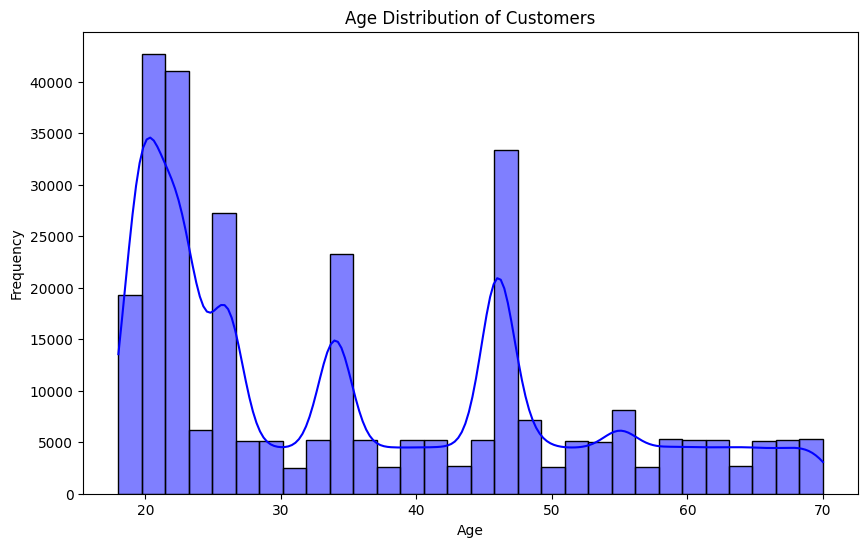

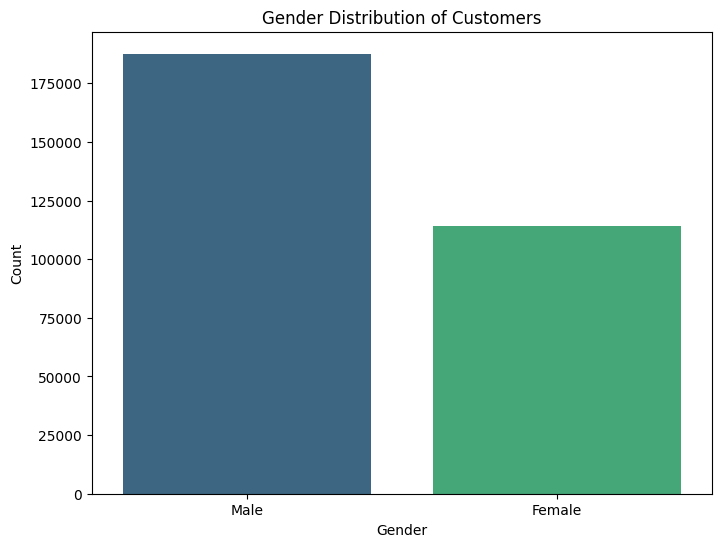

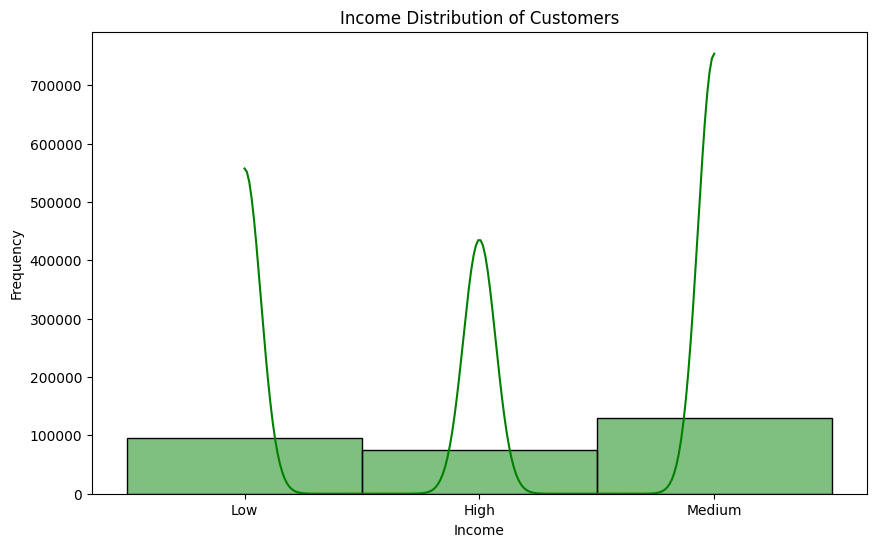

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(retail_data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=retail_data, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(retail_data['Income'], kde=True, bins=30, color='green')
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


## Purchasing Patterns Analysis

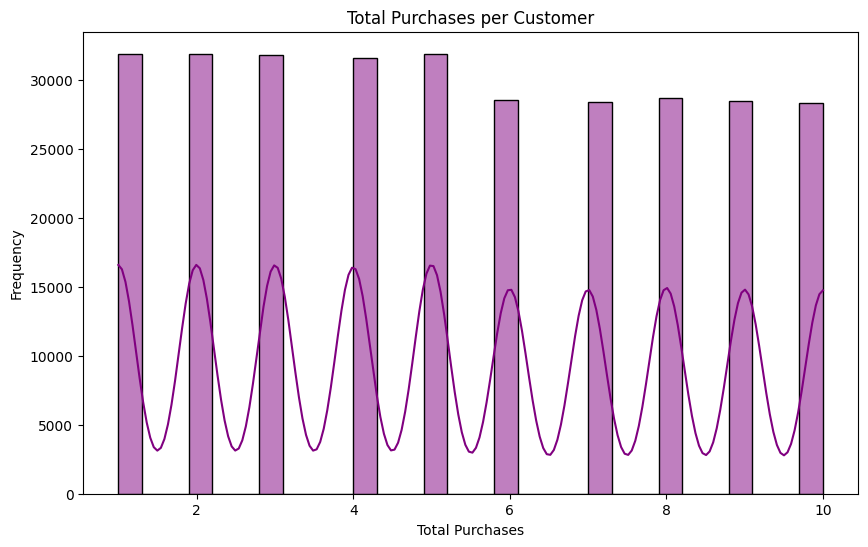

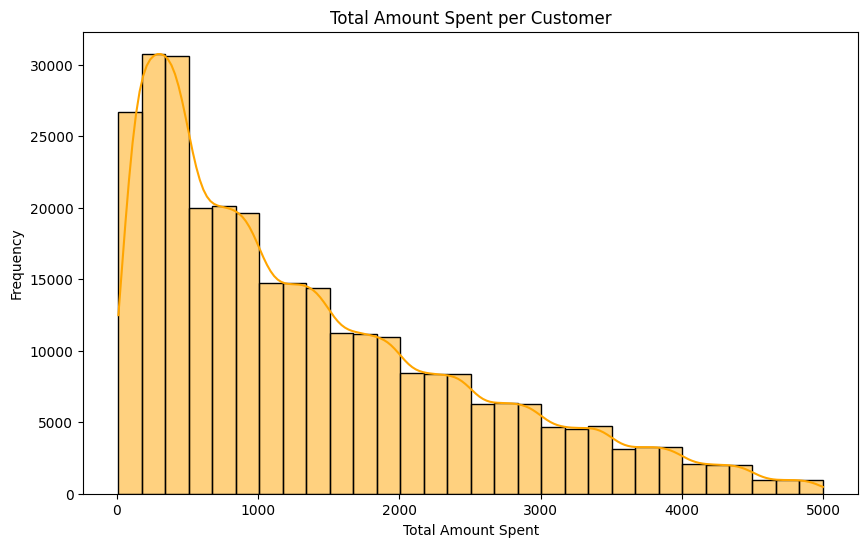

In [13]:

plt.figure(figsize=(10, 6))
sns.histplot(retail_data['Total_Purchases'], kde=True, bins=30, color='purple')
plt.title('Total Purchases per Customer')
plt.xlabel('Total Purchases')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(retail_data['Total_Amount'], kde=True, bins=30, color='orange')
plt.title('Total Amount Spent per Customer')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency')
plt.show()


## Product Preferences Analysis

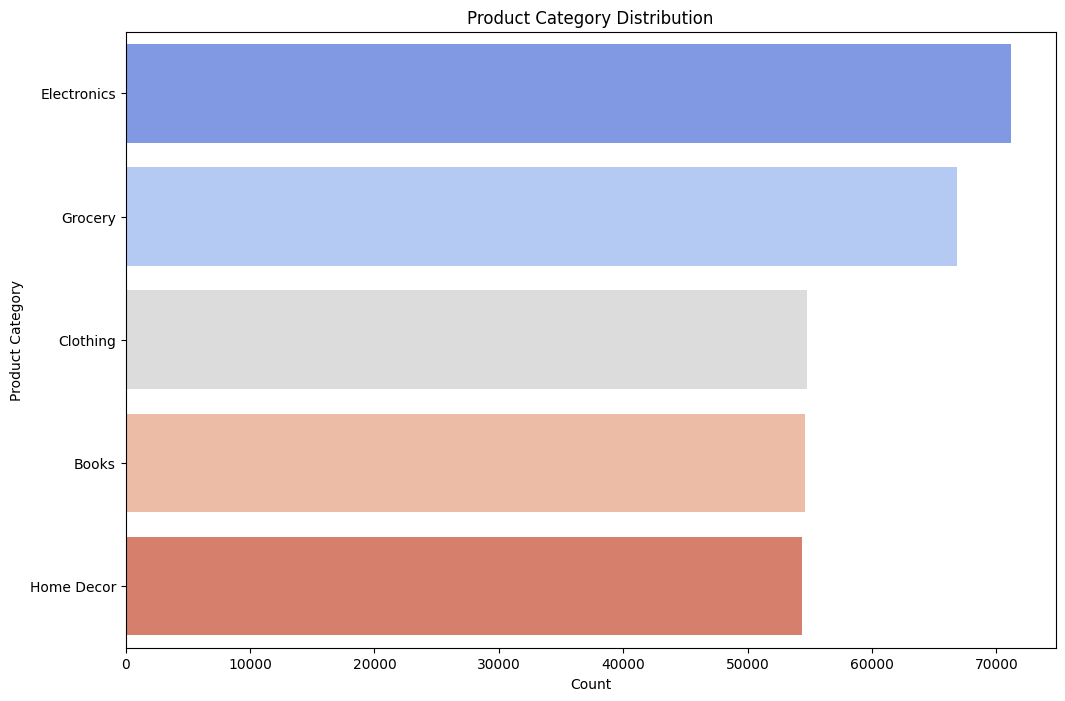

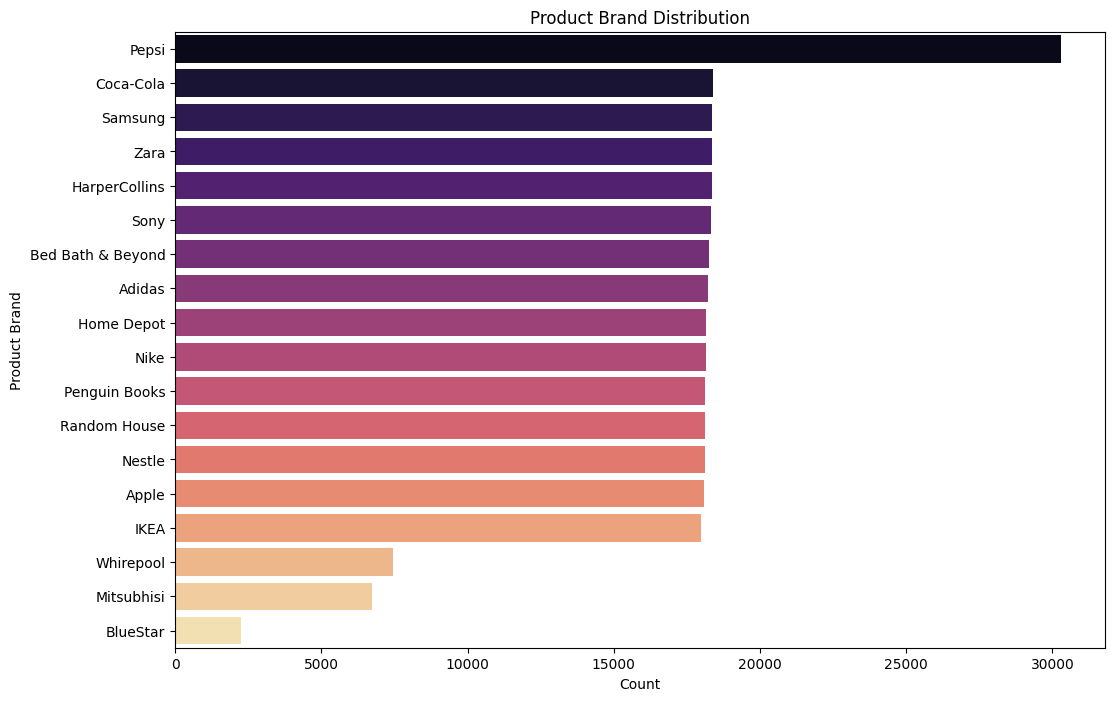

In [14]:

plt.figure(figsize=(12, 8))
sns.countplot(y='Product_Category', data=retail_data, palette='coolwarm', order=retail_data['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(y='Product_Brand', data=retail_data, palette='magma', order=retail_data['Product_Brand'].value_counts().index)
plt.title('Product Brand Distribution')
plt.xlabel('Count')
plt.ylabel('Product Brand')
plt.show()


## Feedback Analysis

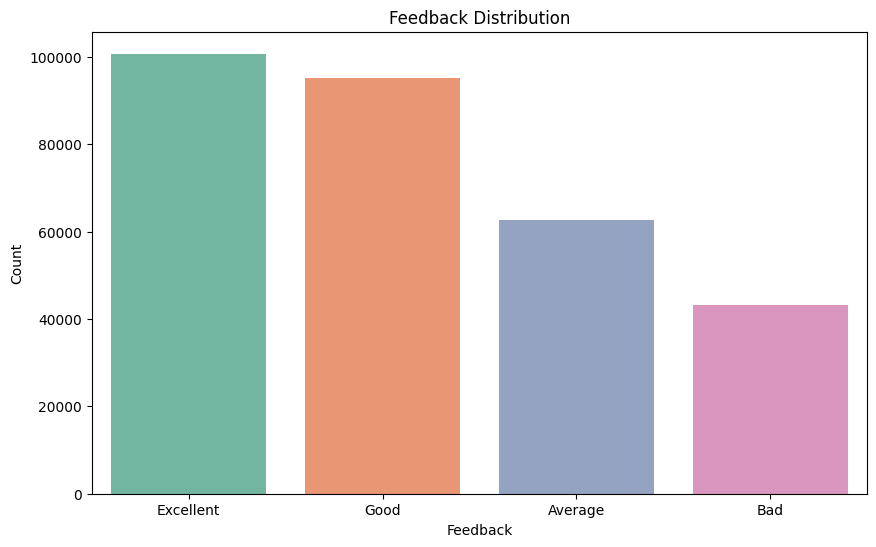

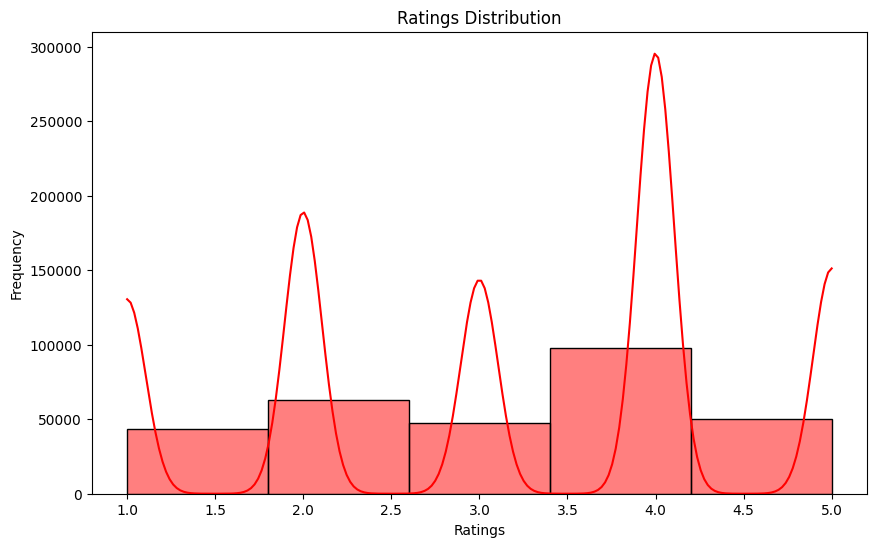

In [15]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Feedback', data=retail_data, palette='Set2', order=retail_data['Feedback'].value_counts().index)
plt.title('Feedback Distribution')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(retail_data['Ratings'], kde=True, bins=5, color='red')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


## Transaction Logistics Analysis

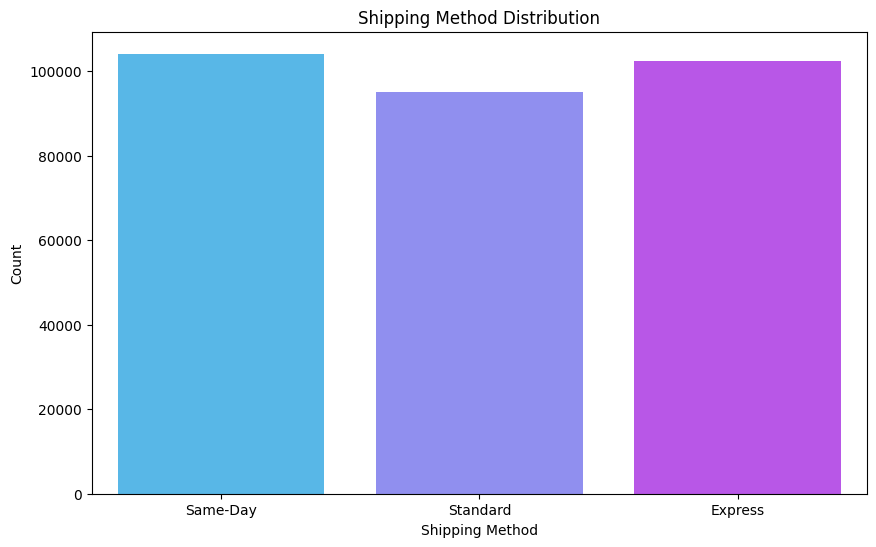

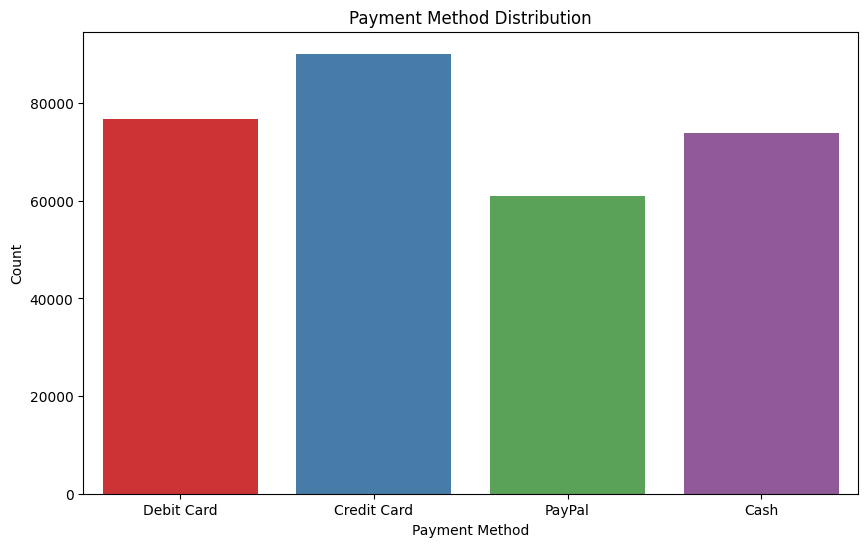

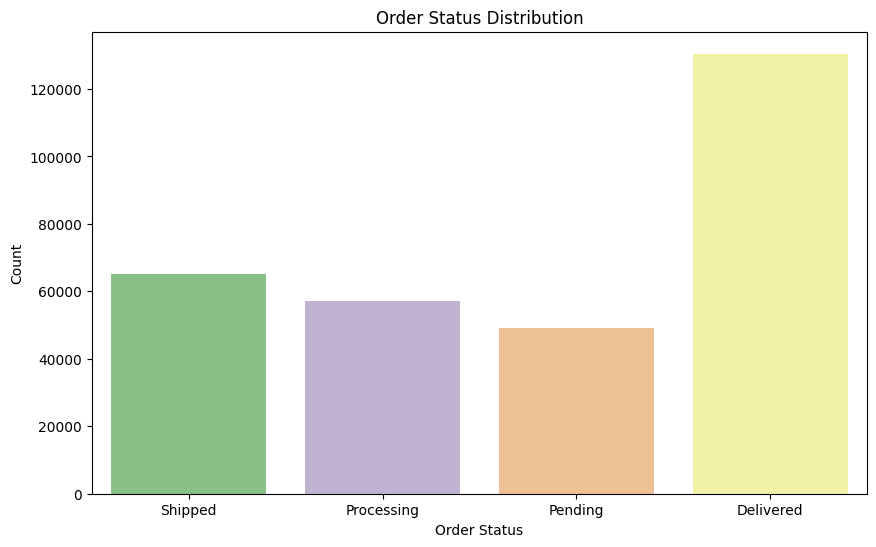

In [16]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping_Method', data=retail_data, palette='cool')
plt.title('Shipping Method Distribution')
plt.xlabel('Shipping Method')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method', data=retail_data, palette='Set1')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Order_Status', data=retail_data, palette='Accent')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


## Correlation Analysis

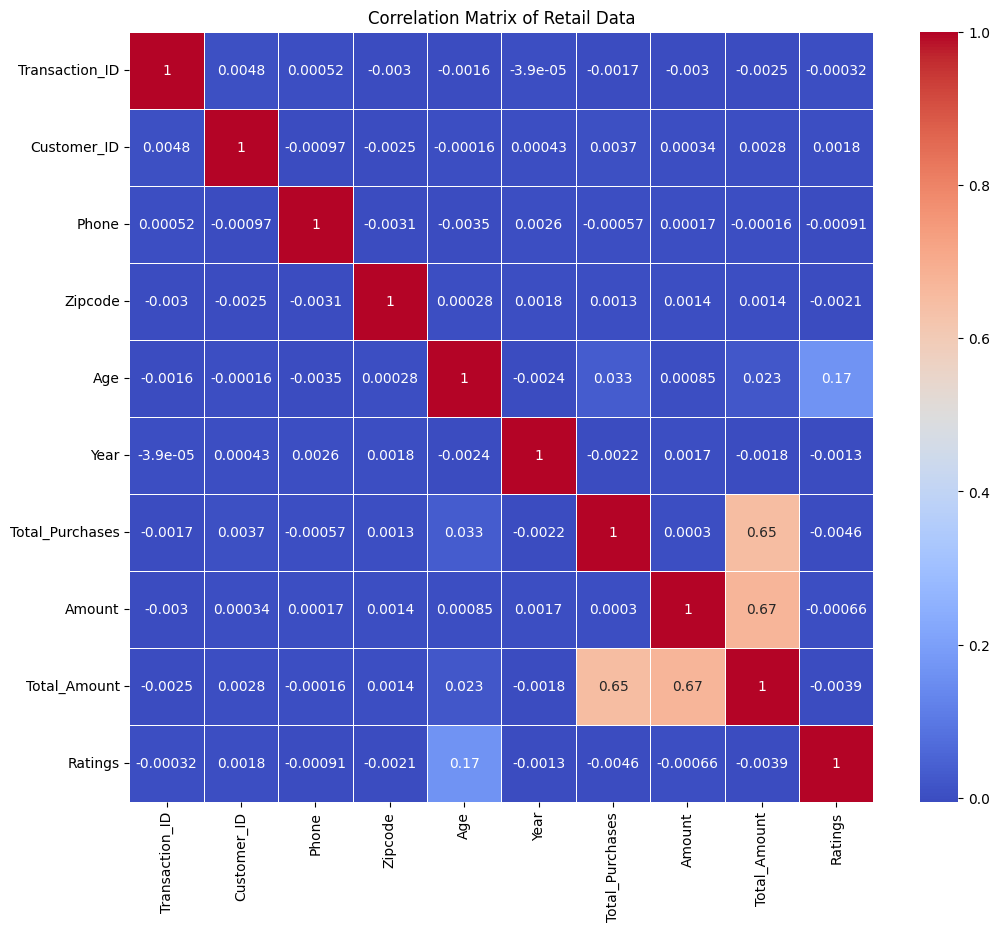

In [17]:
import numpy as np

numeric_columns = retail_data.select_dtypes(include=[np.number]).columns
correlation_matrix = retail_data[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Retail Data')
plt.show()
    

## Customer Segmentation

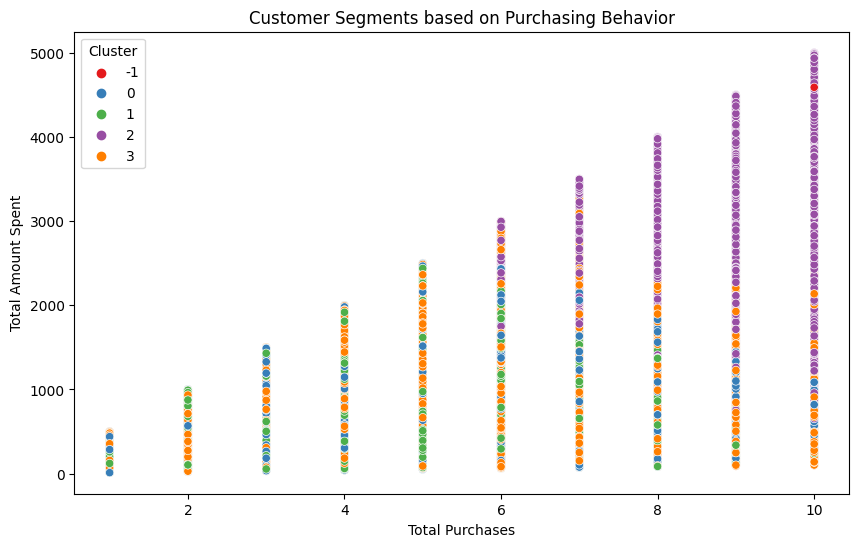

In [22]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
retail_data['Income'] = retail_data['Income'].replace(income_mapping).astype(float)

features = retail_data[['Total_Purchases', 'Total_Amount', 'Age', 'Income']]
features = features.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
clusters = kmeans.labels_

retail_data['Cluster'] = -1
retail_data.loc[features.index, 'Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=retail_data, x='Total_Purchases', y='Total_Amount', hue='Cluster', palette='Set1')
plt.title('Customer Segments based on Purchasing Behavior')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount Spent')
plt.show()
    


## Summary:
1. **Customer Demographics:**
   - The dataset shows a varied age distribution, with the majority of customers falling within the 20-40 age range.
   - The gender distribution is fairly balanced.
   - Income levels also display a wide range, indicating a diverse customer base.

2. **Purchasing Patterns:**
   - Most customers have made multiple purchases, with some high-frequency buyers.
   - The total amount spent varies significantly, highlighting different spending behaviors.

3. **Product Preferences:**
   - Clothing and electronics are the most popular product categories.
   - Certain brands dominate specific categories, reflecting brand loyalty.

4. **Feedback Analysis:**
   - Customer feedback is generally positive, but there are areas for improvement based on lower ratings.

5. **Transaction Logistics:**
   - Standard shipping is the most common method, followed by same-day delivery.
   - Credit cards are the preferred payment method.

6. **Correlation Analysis:**
   - There are significant correlations between certain numerical variables, providing insights into customer behavior.
   
7. **Customer Segmentation:**
   - Customers can be segmented into distinct groups based on their purchasing behavior, which can help in targeted marketing.


## Conclusion:
This comprehensive analysis of the retail transactional dataset reveals valuable insights into customer demographics, purchasing patterns, product preferences, and transactional logistics. Advanced analyses, including correlation, and customer segmentation, provide deeper understanding and actionable intelligence for optimizing marketing strategies, enhancing customer experience, and improving operational efficiency.
